# INFORMATION RETRIEVAL PROJECT

---
## Gender stereotypes in parliamentary speeches

In word embedding models, each word is assigned to a high-dimensional vector such that the geometry of the vectors captures semantic relations between the words – e.g. vectors being closer together has been shown to correspond to more similar words. Recent works in machine learning demonstrate that word embeddings also capture common stereotypes, as these stereotypes are likely to be present, even if subtly, in the large corpora of training texts. These stereotypes are automatically learned by the embedding algorithm and could be problematic in many context if the embedding is then used for sensitive applications such as search rankings, product recommendations, or translations. An important direction of research is on developing algorithms to debias the word embeddings.

This project aims to use the word embeddings to study historical trends – specifically trends in the gender and ethnic stereotypes in the Italian parliamentary speeches from 1948 to 2020.

In [ ]:
import numpy as np
import pandas as pd
import gensim
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
import pickle
import os
from collections import defaultdict, OrderedDict
from tqdm.auto import tqdm
import itertools
from itertools import product
import json
from sklearn.feature_extraction.text import TfidfVectorizer

from INFORET_project import load_embed_model
# import matplotlib.pylab as plt
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

In [ ]:
from INFORET_project import YEARS

In [ ]:
YEARS

In [ ]:
model = load_embed_model(YEARS[0])

In [7]:
model = load_embed_model(YEARS[1])

In [8]:
model = load_embed_model(YEARS[2])

In [16]:
model = load_embed_model(YEARS[3])

# 2. ANALYSIS OF GENDER STEREOTYPES BY YEARS (ANALOGIES)

# 1) PRELIMINARY ANALYSIS
Create a group of gendered words and retrieve the mean vector, then use it to retrieve the most similar words to the vector 

In [30]:
from INFORET_project import similar_to_avg_vector 
from INFORET_project.data import gendered_neutral_words

In [3]:
!ls -lh we_models

total 1088408
-rw-r--r--  1 Niki  staff   4,5M 29 Giu 10:39 W2V_by_years_1948_1968
-rw-r--r--  1 Niki  staff    84M 29 Giu 10:39 W2V_by_years_1948_1968.trainables.syn1neg.npy
-rw-r--r--  1 Niki  staff    84M 29 Giu 10:40 W2V_by_years_1948_1968.wv.vectors.npy
-rw-r--r--  1 Niki  staff   3,5M 29 Giu 10:40 W2V_by_years_1968_1985
-rw-r--r--  1 Niki  staff    65M 29 Giu 10:40 W2V_by_years_1968_1985.trainables.syn1neg.npy
-rw-r--r--  1 Niki  staff    65M 29 Giu 10:41 W2V_by_years_1968_1985.wv.vectors.npy
-rw-r--r--  1 Niki  staff   3,0M 29 Giu 10:41 W2V_by_years_1985_2000
-rw-r--r--  1 Niki  staff    57M 29 Giu 10:41 W2V_by_years_1985_2000.trainables.syn1neg.npy
-rw-r--r--  1 Niki  staff    57M 29 Giu 10:41 W2V_by_years_1985_2000.wv.vectors.npy
-rw-r--r--  1 Niki  staff   2,8M 29 Giu 10:41 W2V_by_years_2000_2020
-rw-r--r--  1 Niki  staff    52M 29 Giu 10:42 W2V_by_years_2000_2020.trainables.syn1neg.npy
-rw-r--r--  1 Niki  staff    52M 29 Giu 10:42 W2V_by_years_2000_2020.wv.vectors.npy


In [31]:
for i,year in enumerate(YEARS):
    print(f"\nYears: {YEARS[i]}")
    model = load_embed_model(YEARS[i])
    
    for gender in ['male','female']:
        print(f"\nMost similar words to {gender} vector:")
        _ = similar_to_avg_vector(model.wv, gendered_neutral_words[gender]) # SISTEMA!


Years: 1948_1968

Most similar words to male vector:


[('Zappelli', 0.5698506832122803),
 ('Settembrini', 0.5646949410438538),
 ('lei', 0.562781572341919),
 ('Lho', 0.5611302256584167),
 ('maschiare', 0.5558352470397949),
 ('divulgatore', 0.5550841093063354),
 ('Uscito', 0.5509503483772278),
 ('brav', 0.5507361888885498),
 ('piglio', 0.5503260493278503),
 ('Spellanzon', 0.5499021410942078),
 ('Montemartini', 0.5494170188903809),
 ('Maffi', 0.545027494430542),
 ('Roggero', 0.5446869134902954),
 ('possedette', 0.543790876865387),
 ('casata', 0.5433430075645447),
 ('Olgiati', 0.5430217981338501),
 ('causidica', 0.5428649187088013),
 ('novantenne', 0.5408570170402527),
 ('Ricordati', 0.539644181728363),
 ('Filpo', 0.5394607186317444)]


Most similar words to female vector:


[('maschio', 0.6027352809906006),
 ('coniugato', 0.5403891801834106),
 ('bambino', 0.5359815359115601),
 ('madre', 0.5300886034965515),
 ('A4110ra', 0.5290261507034302),
 ('Duro', 0.5266222953796387),
 ('pizza', 0.5260553359985352),
 ('traviata', 0.5229917764663696),
 ('caramellare', 0.5219253301620483),
 ('Speravano', 0.519498884677887),
 ('educabili', 0.5186226963996887),
 ('piazzarsi', 0.5178252458572388),
 ('tenerissima', 0.5173928141593933),
 ('ragazza', 0.516727864742279),
 ('PerchP', 0.5149996280670166),
 ('Parlavamo', 0.5093346238136292),
 ('epoi', 0.5088962316513062),
 ('magliaie', 0.5078704953193665),
 ('Nbn', 0.507202684879303),
 ('ragazzina', 0.5067441463470459)]


Years: 1968_1985

Most similar words to male vector:


[('imparentare', 0.5919234752655029),
 ('dabbene', 0.5873482823371887),
 ('Cascavilla', 0.5757697224617004),
 ('moraleggiare', 0.57254558801651),
 ('Pascal', 0.5718967914581299),
 ('degnissima', 0.5694552063941956),
 ('toccarla', 0.5629111528396606),
 ('incestuoso', 0.5626682639122009),
 ('Mahler', 0.5580506324768066),
 ('Pagheranno', 0.5543779730796814),
 ('Ponzo', 0.5536849498748779),
 ('Studenti', 0.5516732931137085),
 ('andarvi', 0.5507052540779114),
 ('integerrimo', 0.5496920943260193),
 ('focoso', 0.5495660305023193),
 ('sottoccupato', 0.5480859279632568),
 ('peccatore', 0.5471469759941101),
 ('svillaneggiare', 0.5464788675308228),
 ('suggestivamente', 0.5458648800849915),
 ('violabili', 0.545601487159729)]


Most similar words to female vector:


[('emancipato', 0.6487357020378113),
 ('sessualmente', 0.6152198314666748),
 ('maschiare', 0.6015832424163818),
 ('giovanissime', 0.5884872674942017),
 ('nubile', 0.5852416157722473),
 ('focomelico', 0.5786728858947754),
 ('55°', 0.5733279585838318),
 ('evirare', 0.5684111714363098),
 ('lei', 0.5655562281608582),
 ('lesbica', 0.565072774887085),
 ('abortire', 0.5640296339988708),
 ('ragazza', 0.5634415149688721),
 ('sgraziato', 0.5633205771446228),
 ('incinto', 0.5623881220817566),
 ('Resti', 0.5620538592338562),
 ('puerpera', 0.561506450176239),
 ('Vapona', 0.5599506497383118),
 ('malformato', 0.5562317371368408),
 ('nutrice', 0.5554565191268921),
 ('incestuoso', 0.5538656711578369)]


Years: 1985_2000

Most similar words to male vector:


[('capoccia', 0.5751026272773743),
 ('supplicare', 0.5648277401924133),
 ('evangelista', 0.5597399473190308),
 ('coglione', 0.5544094443321228),
 ('prostituire', 0.5524687767028809),
 ('tenerezza', 0.5514913201332092),
 ('aguzzino', 0.5504509210586548),
 ('Nietzsche', 0.5490137338638306),
 ('immodestamente', 0.545851469039917),
 ('sentirla', 0.5446656942367554),
 ('battagliero', 0.5441685914993286),
 ('Votano', 0.5432336330413818),
 ('squartare', 0.542973518371582),
 ('Parlava', 0.5422471165657043),
 ('abate', 0.5420100092887878),
 ('cannonata', 0.5413274765014648),
 ('ubriacare', 0.5363138318061829),
 ('motoretta', 0.5358209609985352),
 ('Arbore', 0.5346950888633728),
 ('Milton', 0.5343030691146851)]


Most similar words to female vector:


[('divorziato', 0.5739867091178894),
 ('menopausa', 0.5716233849525452),
 ('giovanissime', 0.5603377819061279),
 ('incinto', 0.558162271976471),
 ('partoriente', 0.5513758659362793),
 ('sieropositivo', 0.551144540309906),
 ('monoparentali', 0.5507063269615173),
 ('empowerment', 0.5504602789878845),
 ('motoretta', 0.5501375198364258),
 ('bambino', 0.548194408416748),
 ('single', 0.546561062335968),
 ('bambina', 0.5425636768341064),
 ('persona', 0.5407829284667969),
 ('ragazza', 0.5405844449996948),
 ('accudire', 0.5405091643333435),
 ('adulto', 0.5365861654281616),
 ('giovane', 0.5364285707473755),
 ('procreare', 0.5351355075836182),
 ('studentessa', 0.5350608229637146),
 ('maciullare', 0.5350210070610046)]


Years: 2000_2020

Most similar words to male vector:


[('moderatore', 0.5495796799659729),
 ('magistrate', 0.537135124206543),
 ('Uomini', 0.525381326675415),
 ('probo', 0.5215122103691101),
 ('anonimamente', 0.518482506275177),
 ('gesuita', 0.517815887928009),
 ('Mensorio', 0.5054284930229187),
 ('Franchi', 0.5021278262138367),
 ('PadoaSchioppa', 0.5015751719474792),
 ('Masih', 0.5006906390190125),
 ('Rapisarda', 0.49734416604042053),
 ('Restituiamo', 0.49563267827033997),
 ('Pinchera', 0.4954855442047119),
 ('eroicamente', 0.4952343702316284),
 ('icari', 0.49391478300094604),
 ('Castiglioni', 0.49375438690185547),
 ('semianalfabeta', 0.4926125407218933),
 ('onorabile', 0.49101564288139343),
 ('Sponziello', 0.4908043444156647),
 ('Dracula', 0.4868161976337433)]


Most similar words to female vector:


[('incinto', 0.61652010679245),
 ('maschiare', 0.5876336693763733),
 ('bambina', 0.5753710865974426),
 ('spose', 0.5685369372367859),
 ('uomini', 0.5532326102256775),
 ('Uomini', 0.5529881715774536),
 ('picchiata', 0.5529308915138245),
 ('normodotate', 0.5496178865432739),
 ('genealogia', 0.5464109182357788),
 ('ragazza', 0.5432000756263733),
 ('monoparentali', 0.5316020846366882),
 ('fattrice', 0.5290380716323853),
 ('puerpera', 0.5267908573150635),
 ('femminilita', 0.5266191363334656),
 ('giovanissime', 0.5249960422515869),
 ('persona', 0.5235183835029602),
 ('bambino', 0.5234599113464355),
 ('bisessuale', 0.5211064219474792),
 ('giovanissima', 0.5206022262573242),
 ('menopausa', 0.5193460583686829)]

### TF-IDF
Use TF-IDF to recover words? how to? 

In [ ]:
basepath = '/home/student/Desktop/COGNOMEnomeMATRICOLA/FORMENTInicole941481'

YEARS = [ "1948_1968", "1968_1985", "1985_2000", "2000_2020" ]
GENDER = ["male","female"]
corpus = []

for years,gender in tqdm(product(YEARS,GENDER),
                        total=len(YEARS)*len(GENDER)):
    print(f'YEARS: {years}, GENDER: {gender}')
    with open(os.path.join(basepath,f'docs_by_years_gender_{years}_{gender}.pickle'), "rb") as output:
        docs = pickle.load(output)
        corpus.append(list(itertools.chain.from_iterable(docs)))

Order of documents is:

```
  0%|                                                     | 0/8 [00:00<?, ?it/s]
YEARS: 1948_1968, GENDER: male
 12%|█████▋                                       | 1/8 [00:22<02:39, 22.78s/it]
YEARS: 1948_1968, GENDER: female
 25%|███████████▎                                 | 2/8 [00:25<01:06, 11.03s/it]
YEARS: 1968_1985, GENDER: male
 38%|████████████████▉                            | 3/8 [00:39<01:01, 12.25s/it]
YEARS: 1968_1985, GENDER: female
 50%|██████████████████████▌                      | 4/8 [00:44<00:38,  9.61s/it]
YEARS: 1985_2000, GENDER: male
 62%|████████████████████████████▏                | 5/8 [01:00<00:35, 11.85s/it]
YEARS: 1985_2000, GENDER: female
 75%|█████████████████████████████████▊           | 6/8 [01:05<00:18,  9.49s/it]
YEARS: 2000_2020, GENDER: male
 88%|███████████████████████████████████████▍     | 7/8 [01:31<00:15, 15.01s/it]
YEARS: 2000_2020, GENDER: female
100%|█████████████████████████████████████████████| 8/8 [01:35<00:00, 11.92s/it]
```

In [ ]:
vectorizer = TfidfVectorizer()
corpus = [' '.join(doc) for doc in corpus] 
X = vectorizer.fit_transform(corpus)
features = vectorizer.get_feature_names()
del corpus

In [ ]:
print(X.shape)

Shape of X is: ```(8, 500080)```

Where there are 8 documents (corpus divided by gender and years) and 500080 words.

In [4]:
def word_to_tfidf(X, features, word):
    index = features.index(word)
    return X[:,index].toarray()

In [ ]:
word_to_tfidf(X, features, 'donna')

Output is:
```
array([[0.00071704],
       [0.01754887],
       [0.00133872],
       [0.01613872],
       [0.00077914],
       [0.01025392],
       [0.00139078],
       [0.01102728]])
```

In [ ]:
with open(os.path.join(basepath,'gendered_neutral_words.json')) as fin:
    gendered_neutral_words = json.load(fin)

WORDS_GROUP = list(gendered_neutral_words.keys())[4:]

In [ ]:
columns = set([w for group in WORDS_GROUP for w in gendered_neutral_words[group] ])
tfidf_words = pd.DataFrame(columns=columns, index=list(product(YEARS,GENDER)))

In [ ]:
for word in tfidf_words.columns:
    try:
        tfidf = word_to_tfidf(X, features, word)
        tfidf_words[word] = tfidf
    except:
        pass

In [ ]:
tfidf_words.to_csv(os.path.join(basepath,'tfidf_words_dataframe'))

In [ ]:
#!/bin/zsh
BASEPATH_src=/home/student/Desktop/COGNOMEnomeMATRICOLA/FORMENTInicole941481
file=$BASEPATH_src'/tfidf_words_dataframe'
scp -P 22 student@***.**.**.**:$file ~/Gender-stereotypes-in-parliamentary-speeches-with-Word-Embedding

---
Load and print data

In [9]:
pd.read_csv()
with open(os.path.join('tfidf_words_dataframe.pickle'), "rb") as fin:
        tfidf_words = pickle.load(fin)

In [11]:
len(tfidf_words)

238968

# 2) ANALOGIES

In [5]:
from INFORET_project import Analogies
from INFORET_project.data import gendered_neutral_words

In [6]:
analogies = Analogies(model.wv)

### COSADD ANALOGIES

In [12]:
analogies.most_similar(positive=['uomo'], negative=['donna'], use_avg_gender=False,
                       topn=10, restrict_vocab=10000, unrestricted=True)

[('uomo', 0.005656701326370239),
 ('amicare', 0.002933981418609619),
 ('Einaudi', 0.0028465425968170165),
 ('insignire', 0.002821769714355469),
 ('cultore', 0.00272569477558136),
 ('galantuomo', 0.002676490545272827),
 ('giurista', 0.0025446230173110963),
 ('scrittore', 0.002505401074886322),
 ('ammonimento', 0.0024813209474086762),
 ('illustre', 0.0024656736850738525)]

In [13]:
analogies.most_similar(use_avg_gender=True, positive_gender='female', 
                       topn=10, restrict_vocab=10000, unrestricted=True)

[('disoccupato', 0.002830326557159424),
 ('casalingo', 0.0027746117115020753),
 ('lavoratrice', 0.002505793869495392),
 ('pesce', 0.0023734423518180846),
 ('ragazza', 0.002282507419586182),
 ('ortofrutticolo', 0.0021844111382961274),
 ('infermiera', 0.0021486078202724457),
 ('POLANO', 0.002142234593629837),
 ('sottoccupazione', 0.0020916299521923066),
 ('sigaretta', 0.0020888128876686094)]

### COSMUL ANALOGIES

In [15]:
analogies.most_similar_cosmul(positive=['uomo'], negative=['donna'])

[('uomo', 1.0007462127664966),
 ('araldo', 1.0004128337478873),
 ('inquisitore', 1.0004002953386042),
 ('interlocutore', 1.0003917878376036),
 ('filosofare', 1.0003912373615655),
 ('amicare', 1.00038621763446),
 ('realizzatore', 1.000375630807797),
 ('Einaudi', 1.0003746830024278),
 ('liberissimo', 1.00037460900971),
 ('insignire', 1.0003713469430722)]

In [16]:
analogies.most_similar(use_avg_gender=True, positive_gender='female')

[('disoccupato', 0.002830326557159424),
 ('casalingo', 0.0027746117115020753),
 ('lavoratrice', 0.002505793869495392),
 ('pesce', 0.0023734423518180846),
 ('ragazza', 0.002282507419586182),
 ('ortofrutticolo', 0.0021844111382961274),
 ('infermiera', 0.0021486078202724457),
 ('POLANO', 0.002142234593629837),
 ('sottoccupazione', 0.0020916299521923066),
 ('sigaretta', 0.0020888128876686094)]

### BOLUKBASI GENERATE ANALOGIES

In [8]:
analogies.generate_analogies(n_analogies=100, seed=['uomo','donna'], use_avg_gender=False,
                            multiple=False, delta=1., restrict_vocab=10000,
                            unrestricted=True)

,uomo,donna,distance,score,most_x,most_y,match
0,uomo,uomini,0.946525,0.002049,uomo,donna,False
1,giovane,donna,0.997564,0.001779,uomo,giovane,False
2,figliare,madre,0.905048,0.001774,uomo,madre,False
3,ammalare,ammalato,0.912308,0.001413,uomo,donna,False
4,classe,lavoratrice,0.956242,0.001347,uomo,classe,False
5,amicare,compagno,0.955529,0.001211,compagno,donna,False
6,ufficiare,ufficio,0.849572,0.001195,ufficio,ufficiare,False
7,suo,loro,0.938783,0.001187,loro,suo,False
8,cittadino,lavoratore,0.973228,0.001165,uomo,cittadino,False
9,dicastero,Ministeri,0.909511,0.001109,Ministeri,dicastero,False


In [11]:
analogies.generate_analogies(n_analogies=100, use_avg_gender=True, )

,female_avg,male_avg,distance,score,most_x,most_y,match
0,ella,egli,0.942863,0.001969,egli,ella,False
1,lei,lui,0.722058,0.001842,lui,lei,False
2,occidentale,occidente,0.775401,0.001315,occidente,occidentale,False
3,Ella,Egli,0.842111,0.001312,Egli,Ella,False
4,donna,giovane,0.997564,0.001259,giovane,donna,False
5,ammalato,ammalare,0.912308,0.001199,ammalare,ammalato,False
6,uomini,uomo,0.946525,0.001180,uomo,uomini,False
7,madre,figliare,0.905048,0.001167,figliare,madre,False
8,porco,porgere,0.890906,0.001125,porgere,porco,False
9,artigianale,commerciale,0.998375,0.001053,commerciale,artigianale,False


----

# EMBEDDED ANALOGIES BIAS (EAB)

Create a list of adjectives to test with analogies: Inspired from https://github.com/nikhgarg/EmbeddingDynamicStereotypes and WEAT test

**Embedded analogies bias** works by retrieving analogies for each neutral word with one gender as positive and the other as negative, then the average similarity between the group of words retrieved and both gendered words is calculated. If there is a difference in the two similarities, it is probable that the words similar to the neutral word are more related to one gender than to the other. Ideally, if there wasn't any stereotype the similarities should be 
The bias is calculated as the difference in the 2 similarities. <br>
The analogy for the same word is calculated both by using as positive one gender and then the other one as positive. 

In [6]:
from INFORET_project.data import gendered_neutral_words
from INFORET_project import EAB

In [7]:
from INFORET_project import WORDS_GROUP
WORDS_GROUP

['adj_appearence',
 'family',
 'career',
 'rage',
 'kindness',
 'intelligence',
 'dumbness',
 'active',
 'passive',
 'gendered_words',
 'female_stereotypes',
 'male_stereotypes']

In [11]:
score = EAB(model.wv,
            gender_female='donna',
            gender_male='uomo',
            type_most_similar = 'cosmul')

In [12]:
top_bias = score.get_top_bias(pred_positive_word='adj_appearence')


Word: brutto
Similarity of 'male' analogies to 'male': 0.4240516021847725, to 'female': 0.12895660232752562
Bias for 'male' analogies: 0.29509499985724685
Similarity of 'female' analogies to 'male': 0.23219432383775712, to 'female': 0.4980472296476364
Bias for 'female' analogies: 0.2658529058098793

Word: rozzo
Similarity of 'male' analogies to 'male': 0.4410634711384773, to 'female': 0.16383448615670204
Bias for 'male' analogies: 0.2772289849817753
Similarity of 'female' analogies to 'male': 0.196292395144701, to 'female': 0.4567902535200119
Bias for 'female' analogies: 0.2604978583753109

Word: piacevole
Similarity of 'male' analogies to 'male': 0.4228265553712845, to 'female': 0.16422654390335084
Bias for 'male' analogies: 0.25860001146793365
Similarity of 'female' analogies to 'male': 0.16246785651892423, to 'female': 0.4143325835466385
Bias for 'female' analogies: 0.25186472702771423

Word: bello
Similarity of 'male' analogies to 'male': 0.4440027758479118, to 'female': 0.1678279

In [13]:
score.print_top_analogies()


Word: brutto

Positive gender: male


[('brutto', 0.5006075524125156),
 ('uomo', 0.5005223682383805),
 ('bruttare', 0.5004065489840138),
 ('hobby', 0.5003803105203399),
 ('araldo', 0.5003687344089883),
 ('inquisitore', 0.500366682238291),
 ('eclettico', 0.5003541856268412),
 ('illustre', 0.5003536100728226),
 ('lapsus', 0.500351871846717),
 ('operetta', 0.5003493893461514)]

Positive gender: female


[('brutto', 0.5005600859855832),
 ('donna', 0.5004986385057769),
 ('ragazza', 0.5004032723367208),
 ('casalingo', 0.500328544216722),
 ('bello', 0.5003203944201551),
 ('coniugato', 0.5003145616937776),
 ('bambina', 0.5003131384860301),
 ('madre', 0.5003053465979763),
 ('traviata', 0.5002912342907856),
 ('passeggiatrice', 0.5002908317425176)]


Word: rozzo

Positive gender: male


[('rozzo', 0.5006219039055707),
 ('uomo', 0.5005169892754816),
 ('inquisitore', 0.500455419909462),
 ('araldo', 0.5004371153029402),
 ('utilitarismo', 0.5004190011979728),
 ('concettualismo', 0.5003995990067123),
 ('esagitare', 0.5003968274480199),
 ('bizzoso', 0.500393146376239),
 ('nichilismo', 0.5003905816233016),
 ('barricadiero', 0.50038961973162)]

Positive gender: female


[('rozzo', 0.5005457362251707),
 ('donna', 0.5004789119451701),
 ('spudorato', 0.500337447730483),
 ('ragazza', 0.5003359080371427),
 ('casalingo', 0.5003239890975809),
 ('lavoratrice', 0.5003226970636082),
 ('atrocemente', 0.5003110050711828),
 ('corredo', 0.5003085493125684),
 ('manganare', 0.5003079792662748),
 ('semioccupati', 0.5003073527299212)]


Word: piacevole

Positive gender: male


[('piacevole', 0.5005808909863496),
 ('uomo', 0.5004710308068522),
 ('inquisitore', 0.5004177921472504),
 ('gioviale', 0.5003904707894042),
 ('contradittore', 0.5003837025546597),
 ('lapsus', 0.5003779481209311),
 ('humour', 0.500376269896909),
 ('dolciastro', 0.5003737697720553),
 ('saggista', 0.5003723295191609),
 ('scontroso', 0.5003714864989046)]

Positive gender: female


[('piacevole', 0.5005867460323099),
 ('donna', 0.500473957698147),
 ('ragazza', 0.5003692248447655),
 ('lcro', 0.5003140290373874),
 ('mamma', 0.5003009791197706),
 ('porcheria', 0.5002964297982023),
 ('femmina', 0.5002946536095313),
 ('domenicale', 0.5002942181836219),
 ('bambina', 0.5002928912929334),
 ('cinematografo', 0.5002928110929492)]


Word: bello

Positive gender: male


[('bello', 0.5005534660074376),
 ('uomo', 0.5004755692305171),
 ('inquisitore', 0.5003749456828501),
 ('insignire', 0.5003735403831805),
 ('immaginifico', 0.5003704779589985),
 ('araldo', 0.5003699806064499),
 ('poesia', 0.5003673813303188),
 ('epoque', 0.500356443934652),
 ('saggista', 0.5003536043434805),
 ('amicare', 0.5003528935286186)]

Positive gender: female


[('bello', 0.5006141729687194),
 ('donna', 0.5005059171087611),
 ('ragazza', 0.5003826497372391),
 ('madre', 0.5003454176428281),
 ('Sovraintendenza', 0.5003402013579572),
 ('Belle', 0.5003192957876542),
 ('Accademie', 0.5003098333607426),
 ('arto', 0.5003065482545623),
 ('femmina', 0.500306205783999),
 ('tessitrici', 0.5003041106575091)]


Word: carino

Positive gender: male


[('carino', 0.5005172475390353),
 ('uomo', 0.5004332181520663),
 ('abilitA', 0.5003347327363333),
 ('Iiberth', 0.5003334800018048),
 ('araldo', 0.5003281758217286),
 ('Eiar', 0.5003205540286989),
 ('chiazzare', 0.5003178634411751),
 ('opt', 0.5003178626960983),
 ('potentissimo', 0.5003108863626589),
 ('bonini', 0.5003107381042139)]

Positive gender: female


[('carino', 0.500650398403555),
 ('donna', 0.5004997780664112),
 ('nutrice', 0.5003819799889268),
 ('lir', 0.5003759527275314),
 ('manganare', 0.5003670921004102),
 ('erie', 0.500366181472612),
 ('ragazza', 0.5003655861061836),
 ('lavoratrice', 0.5003513395646892),
 ('autocolonne', 0.5003489961904586),
 ('madre', 0.5003463264801459)]

In [10]:
top_bias

[('brutto', (0.29509499985724685, 0.2658529058098793)),
 ('rozzo', (0.2772289849817753, 0.2604978583753109)),
 ('piacevole', (0.25860001146793365, 0.25186472702771423)),
 ('bello', (0.2761748660355806, 0.2336318954825401)),
 ('carino', (0.21475374847650527, 0.2890594944357872)),
 ('splendido', (0.2823390983045101, 0.2065805122256279)),
 ('sensuale', (0.2635294824838638, 0.2243047580122948)),
 ('frivolo', (0.25665763914585116, 0.20820132493972776)),
 ('magro', (0.15842187367379668, 0.299074771720916)),
 ('grasso', (0.1626533795148134, 0.17403984862030486))]

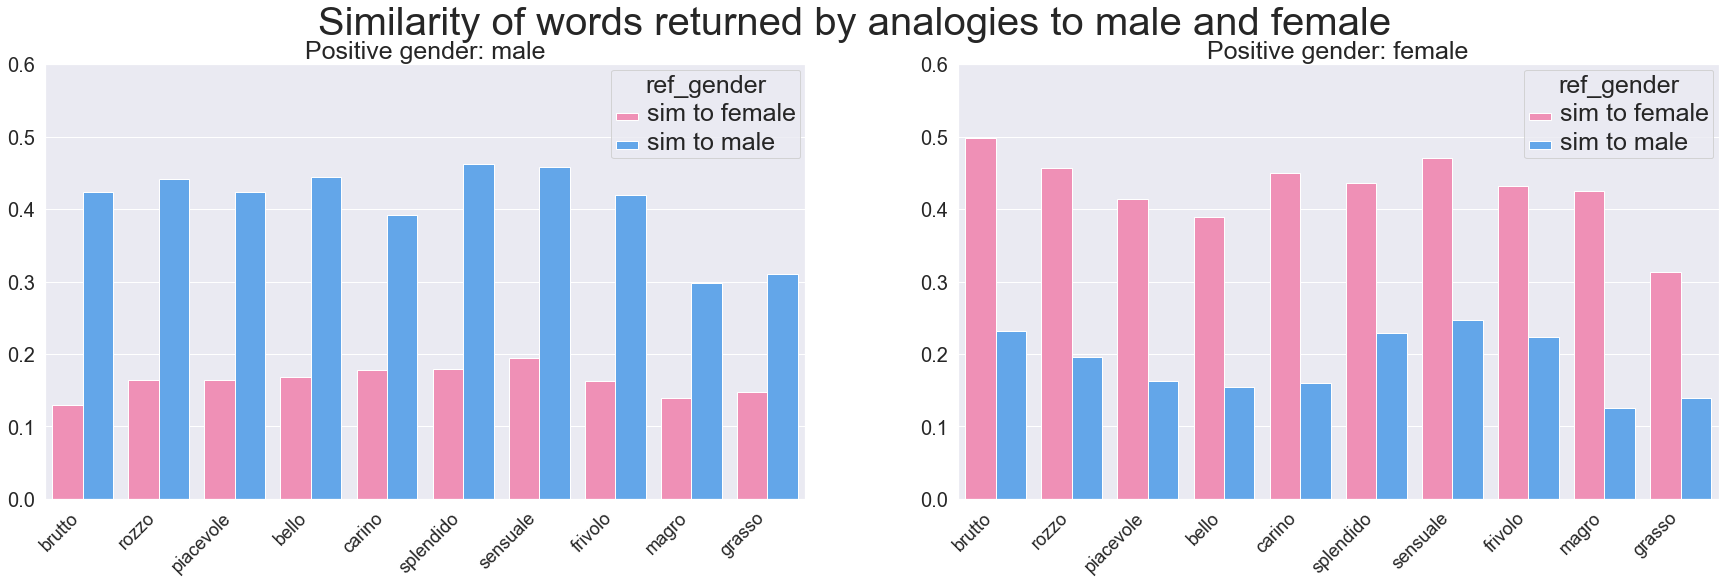

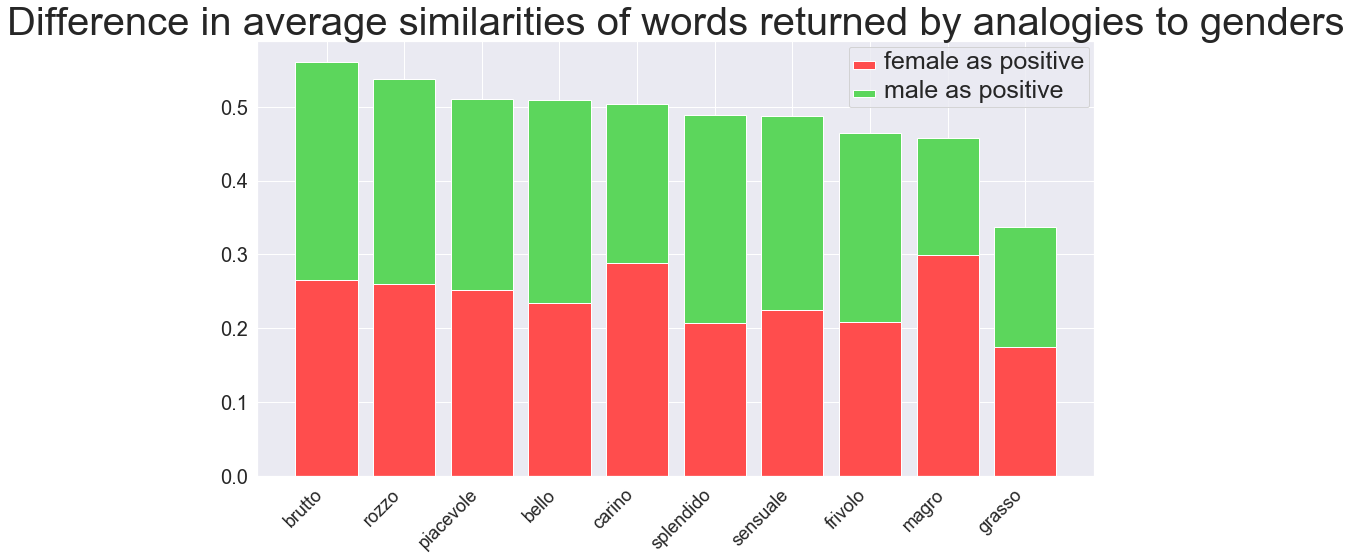

In [11]:
score.plot_bias()

In [12]:
score.get_avg_group_bias()

(0.2413, 0.2445, 0.4859)

---

In [13]:
score = EAB(model.wv,
            use_avg_gender=True,
            type_most_similar = 'cosadd')

In [14]:
top_bias = score.get_top_bias(pred_positive_word='family')


Word: accudire
Similarity of 'male' analogies to 'male': 0.25668581277132035, to 'female': 0.1820064939558506
Bias for 'male' analogies: 0.07467931881546974
Similarity of 'female' analogies to 'male': 0.30427939891815187, to 'female': 0.37619348913431166
Bias for 'female' analogies: 0.0719140902161598

Word: matrimonio
Similarity of 'male' analogies to 'male': 0.3377647399902344, to 'female': 0.2666329726576805
Bias for 'male' analogies: 0.07113176733255389
Similarity of 'female' analogies to 'male': 0.33030027225613595, to 'female': 0.3818299904465675
Bias for 'female' analogies: 0.05152971819043156

Word: bambino
Similarity of 'male' analogies to 'male': 0.4203109800815582, to 'female': 0.4462025463581085
Bias for 'male' analogies: 0.025891566276550315
Similarity of 'female' analogies to 'male': 0.3692569434642792, to 'female': 0.4500099837779999
Bias for 'female' analogies: 0.08075304031372071

Word: famiglia
Similarity of 'male' analogies to 'male': 0.37169394791126253, to 'female

In [15]:
score.print_top_analogies()


Word: accudire

Positive gender: male


[('dedicarsi', 0.004445362687110901),
 ('procurarsi', 0.003897855281829834),
 ('sacrificare', 0.0038402104377746583),
 ('dedicare', 0.0038223356008529664),
 ('adempiere', 0.0036985045671463013),
 ('sostentamento', 0.0036698457598686217),
 ('pasto', 0.003458617329597473),
 ('adattare', 0.0033995354175567626),
 ('esplicare', 0.0033927419781684875),
 ('assolvere', 0.003356236219406128)]

Positive gender: female


[('mangiare', 0.004226142764091492),
 ('bambino', 0.0037913140654563904),
 ('andarsene', 0.0037820088863372804),
 ('pulizia', 0.0037592536211013793),
 ('domestico', 0.003706730604171753),
 ('ragazza', 0.003608248233795166),
 ('mamma', 0.003576974272727966),
 ('tranquillamente', 0.0035543090105056765),
 ('dedicarsi', 0.0035467857122421266),
 ('ora', 0.003395317494869232)]


Word: matrimonio

Positive gender: male


[('matrimonio', 0.008714920282363892),
 ('coniuge', 0.004453501105308533),
 ('contrarre', 0.0040754228830337524),
 ('figliare', 0.004054704904556275),
 ('nullita', 0.003772009313106537),
 ('contrattare', 0.0037107190489768984),
 ('figlio', 0.003701685667037964),
 ('genitore', 0.003638618290424347),
 ('religioso', 0.0036263853311538697),
 ('erede', 0.003617284297943115)]

Positive gender: female


[('matrimonio', 0.008818765878677368),
 ('coniuge', 0.003994110226631165),
 ('madre', 0.003804255127906799),
 ('figlio', 0.0037482964992523195),
 ('minorenne', 0.0036943888664245604),
 ('nullita', 0.003693387508392334),
 ('licenziamento', 0.003666011095046997),
 ('sesso', 0.003582318425178528),
 ('bambino', 0.003506814241409302),
 ('ragazza', 0.0034795206785202025)]


Word: bambino

Positive gender: male


[('bambino', 0.008584889173507691),
 ('bimbo', 0.006671656370162964),
 ('ragazzo', 0.006267432570457459),
 ('figlio', 0.005902101397514343),
 ('genitore', 0.005880438685417175),
 ('fanciullo', 0.005782114267349243),
 ('creatura', 0.005306261777877808),
 ('madre', 0.005008050799369812),
 ('malato', 0.004983475804328919),
 ('padre', 0.004940121173858642)]

Positive gender: female


[('bambino', 0.00896656334400177),
 ('bimbo', 0.006902187466621399),
 ('ragazzo', 0.006570672988891602),
 ('fanciullo', 0.006181245446205139),
 ('ragazza', 0.005692279934883118),
 ('madre', 0.005679070353507996),
 ('ammalato', 0.005560184717178345),
 ('figlio', 0.005275740623474121),
 ('ricoverato', 0.005261427760124207),
 ('scolaro', 0.005137016773223877)]


Word: famiglia

Positive gender: male


[('famiglia', 0.008747725486755372),
 ('famiglio', 0.006578624248504639),
 ('familiare', 0.005478525161743164),
 ('figlio', 0.005005384087562561),
 ('genitore', 0.004810256659984588),
 ('padre', 0.0046809127926826476),
 ('moglie', 0.004532037377357483),
 ('figliare', 0.004367718994617462),
 ('podere', 0.004027146697044372),
 ('colonico', 0.003988499343395233)]

Positive gender: female


[('famiglia', 0.008784778714179993),
 ('famiglio', 0.006578373312950134),
 ('madre', 0.005178713798522949),
 ('figlio', 0.0051274895668029785),
 ('bambino', 0.0050285434722900394),
 ('familiare', 0.005027446746826172),
 ('moglie', 0.004899892508983612),
 ('ragazza', 0.004484929442405701),
 ('mamma', 0.004457286298274994),
 ('colonico', 0.00441476970911026)]


Word: figlio

Positive gender: male


[('figlio', 0.008743928670883179),
 ('genitore', 0.006900186538696289),
 ('figliare', 0.0062721347808837894),
 ('padre', 0.005848220586776733),
 ('moglie', 0.005352215766906738),
 ('coniuge', 0.005329657196998596),
 ('fratello', 0.0052834200859069825),
 ('famiglia', 0.005029486417770386),
 ('sorella', 0.004891587793827057),
 ('bambino', 0.004759061336517334)]

Positive gender: female


[('figlio', 0.008788654804229737),
 ('genitore', 0.006400023698806763),
 ('bambino', 0.006330084204673767),
 ('madre', 0.0059287166595458985),
 ('moglie', 0.005692713260650635),
 ('bimbo', 0.005540204048156738),
 ('ragazzo', 0.005483008623123169),
 ('orfano', 0.00528549075126648),
 ('figliare', 0.005228322744369507),
 ('famiglia', 0.005103728175163269)]

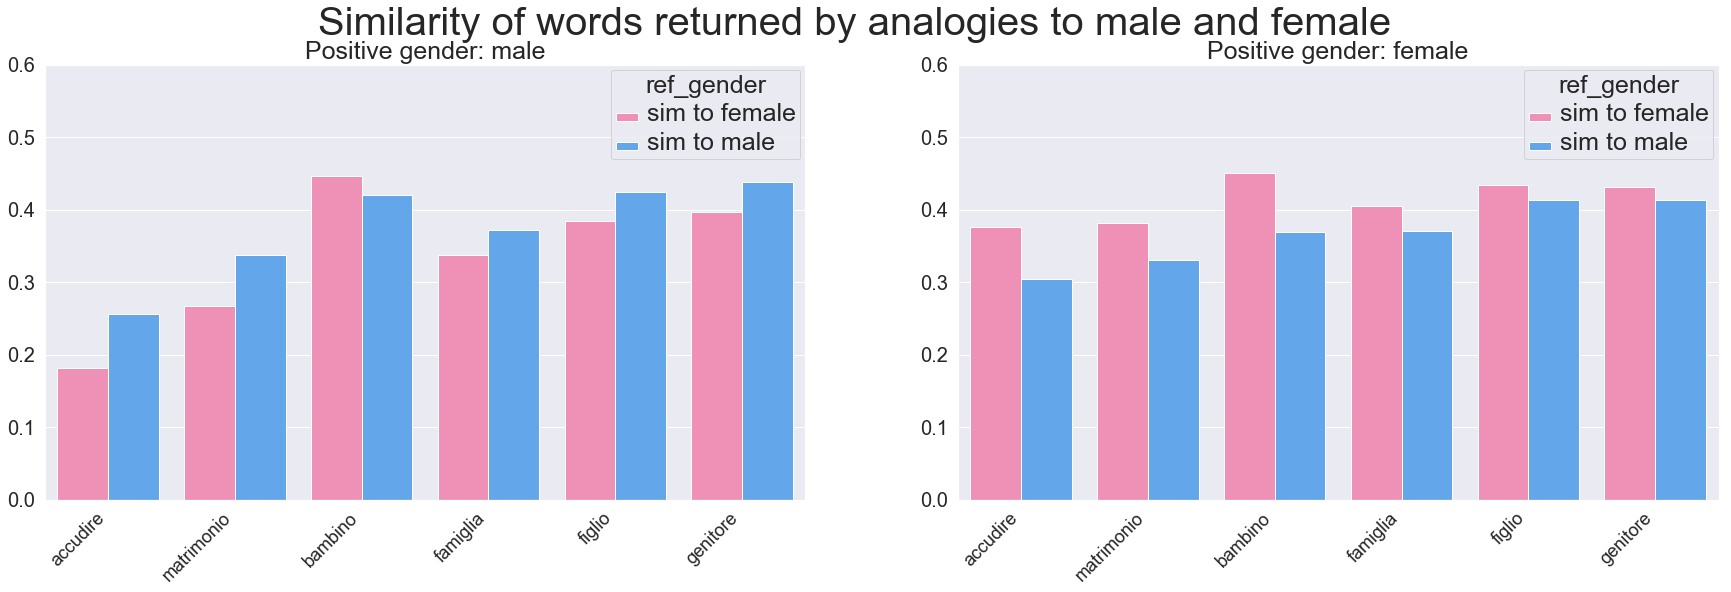

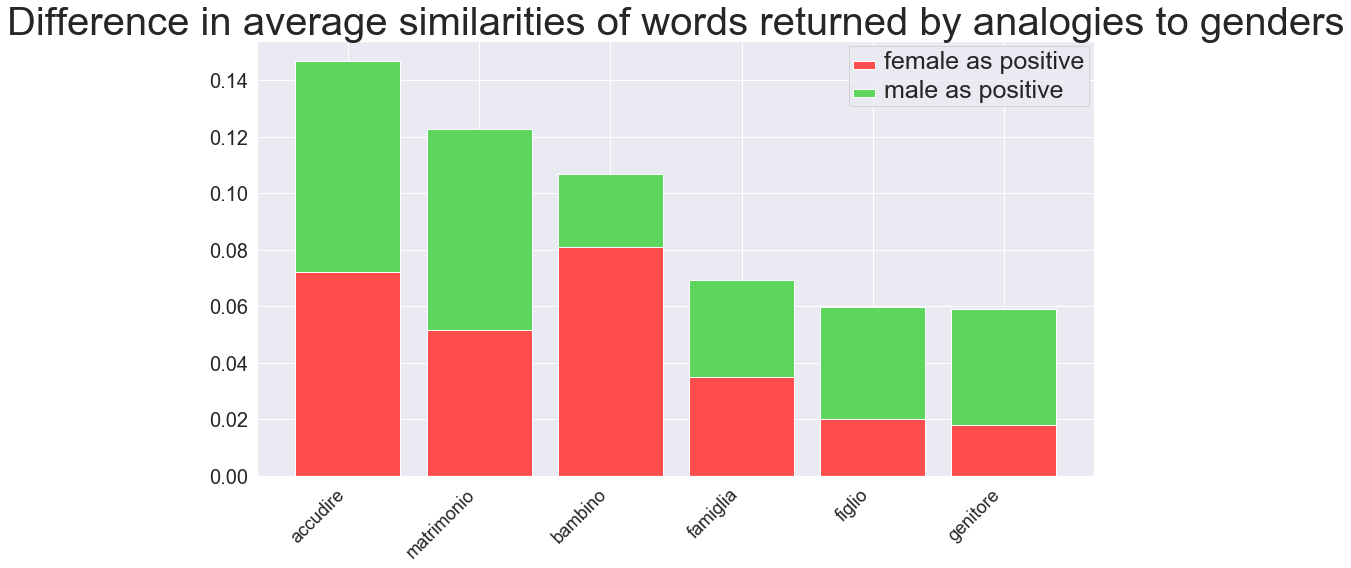

In [16]:
score.plot_bias()

In [17]:
score.get_avg_group_bias()

(0.0462, 0.0478, 0.0939)

---

In [15]:
score = EAB(model.wv,
            use_avg_gender=True,
            type_most_similar = 'cosadd')
top_bias = score.get_top_bias(pred_positive_word='female_stereotypes')


Word: frivolo
Similarity of 'male' analogies to 'male': 0.33435668498277665, to 'female': 0.20696676522493362
Bias for 'male' analogies: 0.12738991975784303
Similarity of 'female' analogies to 'male': 0.22765472382307053, to 'female': 0.2569467440247536
Bias for 'female' analogies: 0.02929202020168306

Word: insicuro
Similarity of 'male' analogies to 'male': 0.19862803369760512, to 'female': 0.12874480299651622
Bias for 'male' analogies: 0.0698832307010889
Similarity of 'female' analogies to 'male': 0.164615685492754, to 'female': 0.21171577870845795
Bias for 'female' analogies: 0.047100093215703964

Word: gentile
Similarity of 'male' analogies to 'male': 0.33772152066230776, to 'female': 0.23355307877063752
Bias for 'male' analogies: 0.10416844189167024
Similarity of 'female' analogies to 'male': 0.2805235028266907, to 'female': 0.28013217002153395
Bias for 'female' analogies: 0.00039133280515674107

Word: silenzioso
Similarity of 'male' analogies to 'male': 0.30759482830762863, to '

In [16]:
score.print_top_analogies()


Word: frivolo

Positive gender: male


[('amicare', 0.003863486349582672),
 ('poesia', 0.0038369053602218626),
 ('Papa', 0.003679029047489166),
 ('simpatico', 0.0035932415723800657),
 ('insignire', 0.0035058224201202394),
 ('volgare', 0.0034685468673706053),
 ('Guido', 0.0034130319952964784),
 ('nobile', 0.0034020793437957763),
 ('vicino', 0.0033868837356567385),
 ('immagine', 0.003377901315689087)]

Positive gender: female


[('poesia', 0.003796457350254059),
 ('bello', 0.0037228143215179443),
 ('grottesco', 0.0036793482303619385),
 ('antipatico', 0.0036234024167060854),
 ('brutto', 0.003480411171913147),
 ('ridere', 0.003425934314727783),
 ('commedia', 0.003364333510398865),
 ('scherzare', 0.003342511355876923),
 ('ridicolo', 0.003333587646484375),
 ('volgare', 0.0033247685432434082)]


Word: insicuro

Positive gender: male


[('incerto', 0.004819672703742981),
 ('precario', 0.0044992265105247495),
 ('redditizio', 0.0043347090482711795),
 ('inefficiente', 0.0041032075881958004),
 ('vantaggioso', 0.004024180769920349),
 ('impossibile', 0.003987058997154236),
 ('duraturo', 0.003974865674972534),
 ('conveniente', 0.003957725167274475),
 ('fecondare', 0.003928796052932739),
 ('inadatto', 0.003914627730846405)]

Positive gender: female


[('precario', 0.004378679394721985),
 ('indifeso', 0.004222358465194702),
 ('incerto', 0.0040036791563034056),
 ('inadatto', 0.003978552520275116),
 ('inabitabile', 0.003913127481937408),
 ('insoddisfacente', 0.0039118388295173645),
 ('deficiente', 0.0038324940204620362),
 ('allagare', 0.003786865770816803),
 ('disoccupato', 0.0037576788663864135),
 ('saltuario', 0.003749152719974518)]


Word: gentile

Positive gender: male


[('gentile', 0.008696163296699524),
 ('cortese', 0.005308477878570556),
 ('cordiale', 0.004991891086101532),
 ('simpatico', 0.004698159098625183),
 ('amichevole', 0.004588497579097748),
 ('affettuoso', 0.004531921744346619),
 ('amicare', 0.004367128312587738),
 ('generoso', 0.004323170483112335),
 ('sincerare', 0.004284681081771851),
 ('temperamento', 0.004280786514282226)]

Positive gender: female


[('gentile', 0.008838723301887513),
 ('cortese', 0.005091403126716614),
 ('cortesia', 0.004740877747535705),
 ('benevolo', 0.004050349891185761),
 ('simpatico', 0.004043972194194794),
 ('mamma', 0.0037843918800354003),
 ('cordiale', 0.0037244385480880737),
 ('dolce', 0.003702157139778137),
 ('benevolenza', 0.003685803413391113),
 ('cortesemente', 0.003653104305267334)]


Word: silenzioso

Positive gender: male


[('silenzioso', 0.008714000582695008),
 ('tenace', 0.004768370389938354),
 ('operoso', 0.004725664854049683),
 ('appassionato', 0.00410462886095047),
 ('esiliare', 0.0040176349878311155),
 ('fedele', 0.0040138870477676395),
 ('umile', 0.00401228129863739),
 ('abnegazione', 0.004002611637115478),
 ('generoso', 0.003967815041542053),
 ('paziente', 0.003956983685493469)]

Positive gender: female


[('silenzioso', 0.008819732666015625),
 ('tenace', 0.0038531714677810668),
 ('gente', 0.0036549127101898195),
 ('paziente', 0.0036176067590713503),
 ('montanaro', 0.003600500226020813),
 ('operoso', 0.0035854318737983705),
 ('disperazione', 0.0035758444666862486),
 ('sofferenza', 0.0035630691051483153),
 ('umiliare', 0.0035345977544784545),
 ('massacrare', 0.0034812635183334353)]


Word: bello

Positive gender: male


[('bello', 0.008664895892143249),
 ('antichita', 0.004800139367580414),
 ('bellissima', 0.004631507396697998),
 ('magnifico', 0.004613238275051117),
 ('poesia', 0.004260115325450897),
 ('insignire', 0.004219437837600708),
 ('nobile', 0.004213164746761322),
 ('brutto', 0.004183873534202576),
 ('nobiliare', 0.004070282280445099),
 ('amicare', 0.0038069218397140505)]

Positive gender: female


[('bello', 0.008872917294502259),
 ('brutto', 0.0045347198843956),
 ('antichita', 0.004452863335609436),
 ('arto', 0.0040467256307601925),
 ('magnifico', 0.004025049209594726),
 ('poesia', 0.003803369104862213),
 ('ragazza', 0.003510529398918152),
 ('bellezza', 0.0034122100472450258),
 ('bellissima', 0.00335568368434906),
 ('ridere', 0.0033331745862960815)]

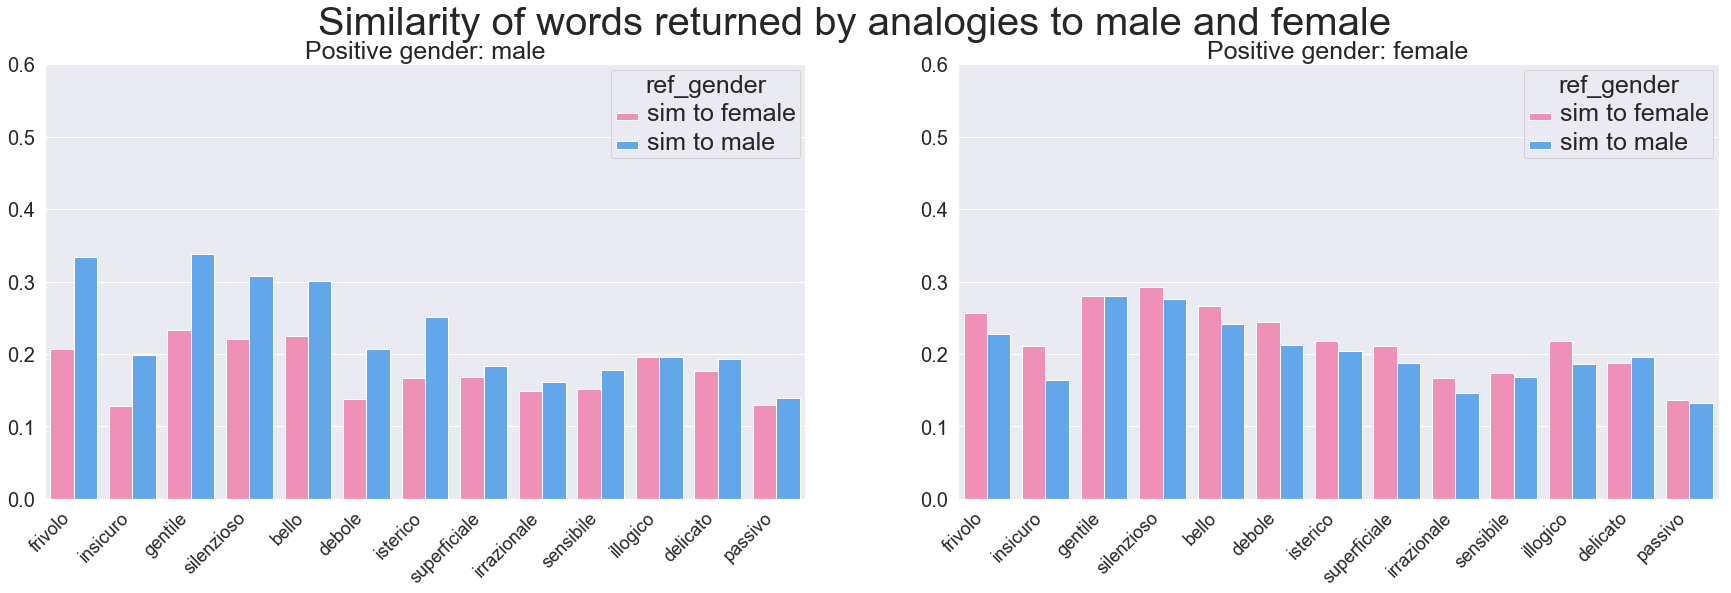

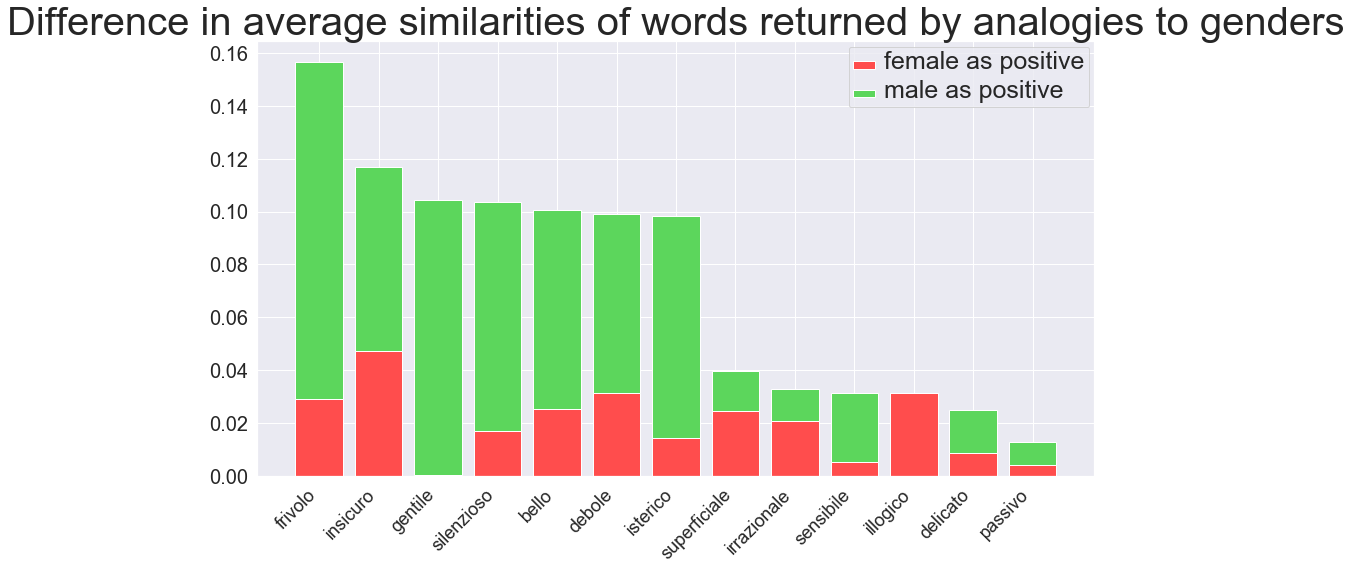

In [10]:
score.plot_bias()

In [11]:
score.get_avg_group_bias()

(0.02, 0.0533, 0.0733)

---
Store the results for all the models and all the groups of words

In [27]:
EAB_top_bias_NO_avg_gender

OrderedDict([('1948_1968',
              defaultdict(collections.OrderedDict,
                          {'adj_appearence': [('brutto',
                             (0.29509499985724685, 0.2658529058098793)),
                            ('rozzo',
                             (0.2772289849817753, 0.2604978583753109)),
                            ('piacevole',
                             (0.25860001146793365, 0.25186472702771423)),
                            ('bello',
                             (0.2761748660355806, 0.2336318954825401)),
                            ('carino',
                             (0.21475374847650527, 0.2890594944357872)),
                            ('splendido',
                             (0.2823390983045101, 0.2065805122256279)),
                            ('sensuale',
                             (0.2635294824838638, 0.2243047580122948)),
                            ('frivolo',
                             (0.25665763914585116, 0.20820132493972776)),
   

In [19]:
EAB_top_bias_NO_avg_gender =  defaultdict(lambda : defaultdict(OrderedDict))
EAB_top_bias_avg_gender = defaultdict(lambda : defaultdict(OrderedDict))

EAB_group_bias_NO_avg_gender = defaultdict(lambda : defaultdict(OrderedDict))
EAB_group_bias_avg_gender = defaultdict(lambda : defaultdict(OrderedDict))

for year in tqdm(YEARS,
                   desc='Passing models'
                  ):
    model = load_embed_model(year)
    
    for group in tqdm(WORDS_GROUP,
                        desc='Passing groups of words'
                     ):
        score = EAB(model.wv, 
                    gender_female='donna', gender_male='uomo',
                    type_most_similar = 'cosmul')
        top_bias = score.get_top_bias(pred_positive_word=group, verbose=False)
        avg_group_bias = score.get_avg_group_bias()
        
        EAB_top_bias_NO_avg_gender[year][group] = top_bias
        EAB_group_bias_NO_avg_gender[year][group] = avg_group_bias
        
        score = EAB(model.wv, 
                    use_avg_gender=True,
                    type_most_similar = 'cosmul')
        top_bias = score.get_top_bias(pred_positive_word=group, verbose=False)
        avg_group_bias = score.get_avg_group_bias()
        
        EAB_top_bias_avg_gender[year][group] = top_bias
        EAB_group_bias_avg_gender[year][group] = avg_group_bias

In [20]:
for year in YEARS:
    print(f'\nYEAR: {year}\n')
    print('MODEL: No average gender vector\n')
    sorted_keys = sorted(EAB_group_bias_NO_avg_gender[year].keys(), 
                                 key=lambda x: (EAB_group_bias_NO_avg_gender[year][x][2]),
                                 reverse=True) 
    for key in sorted_keys:
        print(f'{key}: {EAB_group_bias_NO_avg_gender[year][key]}')
        
    print('\nMODEL: Average gender vector\n')
    sorted_keys = sorted(EAB_group_bias_avg_gender[year].keys(), 
                                 key=lambda x: (EAB_group_bias_avg_gender[year][x][2]),
                                 reverse=True) 
    for key in sorted_keys:
        print(f'{key}: {EAB_group_bias_avg_gender[year][key]}')


YEAR: 1948_1968

MODEL: No average gender vector

gendered_words: (0.2951, 0.227, 0.5221)
active: (0.2291, 0.2674, 0.4965)
adj_appearence: (0.2413, 0.2445, 0.4859)
male_stereotypes: (0.2048, 0.2572, 0.462)
kindness: (0.2177, 0.2414, 0.4592)
passive: (0.2317, 0.2266, 0.4582)
family: (0.3089, 0.1422, 0.4511)
intelligence: (0.1846, 0.2532, 0.4378)
female_stereotypes: (0.1995, 0.2288, 0.4283)
rage: (0.1677, 0.247, 0.4147)
dumbness: (0.1623, 0.2323, 0.3947)
career: (0.1676, 0.1873, 0.3548)

MODEL: Average gender vector

gendered_words: (0.0709, 0.0524, 0.1232)
intelligence: (0.0446, 0.07, 0.1146)
adj_appearence: (0.0798, 0.0292, 0.109)
family: (0.0698, 0.0224, 0.0923)
career: (0.0381, 0.0422, 0.0802)
male_stereotypes: (0.0307, 0.047, 0.0778)
passive: (0.0479, 0.024, 0.0719)
female_stereotypes: (0.0416, 0.0213, 0.063)
kindness: (0.0231, 0.0377, 0.0608)
rage: (0.0319, 0.0284, 0.0602)
dumbness: (0.0425, 0.0173, 0.0598)
active: (0.0183, 0.0366, 0.0549)

YEAR: 1968_1985

MODEL: No average gende

---

In [21]:
columns = []
for year in YEARS:
    columns.append(f'EAB_{year}')
    columns.append(f'EAB_avg_gender_{year}')
    columns.append(f'ECT_{year}')
    columns.append(f'WEAT_{year}')
    
results = pd.DataFrame(columns=columns)

In [23]:
for year in YEARS:
    results[f'EAB_{year}'] = sorted(EAB_group_bias_NO_avg_gender[year].keys(), 
                                 key=lambda x: (EAB_group_bias_NO_avg_gender[year][x][2]),
                                 reverse=True) 
    results[f'EAB_avg_gender_{year}'] = sorted(EAB_group_bias_avg_gender[year].keys(), 
                                 key=lambda x: (EAB_group_bias_avg_gender[year][x][2]),
                                 reverse=True) 
    

In [24]:
results

,EAB_1948_1968,EAB_avg_gender_1948_1968,ECT_1948_1968,WEAT_1948_1968,EAB_1968_1985,EAB_avg_gender_1968_1985,ECT_1968_1985,WEAT_1968_1985,EAB_1985_2000,EAB_avg_gender_1985_2000,ECT_1985_2000,WEAT_1985_2000,EAB_2000_2020,EAB_avg_gender_2000_2020,ECT_2000_2020,WEAT_2000_2020
0,gendered_words,gendered_words,NaN,NaN,gendered_words,gendered_words,NaN,NaN,gendered_words,gendered_words,NaN,NaN,gendered_words,gendered_words,NaN,NaN
1,active,intelligence,NaN,NaN,active,family,NaN,NaN,family,family,NaN,NaN,passive,family,NaN,NaN
2,adj_appearence,adj_appearence,NaN,NaN,passive,adj_appearence,NaN,NaN,passive,career,NaN,NaN,family,rage,NaN,NaN
3,male_stereotypes,family,NaN,NaN,kindness,dumbness,NaN,NaN,adj_appearence,passive,NaN,NaN,rage,passive,NaN,NaN
4,kindness,career,NaN,NaN,intelligence,intelligence,NaN,NaN,rage,kindness,NaN,NaN,intelligence,career,NaN,NaN
5,passive,male_stereotypes,NaN,NaN,adj_appearence,female_stereotypes,NaN,NaN,kindness,adj_appearence,NaN,NaN,adj_appearence,dumbness,NaN,NaN
6,family,passive,NaN,NaN,family,kindness,NaN,NaN,active,female_stereotypes,NaN,NaN,kindness,female_stereotypes,NaN,NaN
7,intelligence,female_stereotypes,NaN,NaN,male_stereotypes,male_stereotypes,NaN,NaN,female_stereotypes,intelligence,NaN,NaN,male_stereotypes,male_stereotypes,NaN,NaN
8,female_stereotypes,kindness,NaN,NaN,female_stereotypes,passive,NaN,NaN,career,active,NaN,NaN,active,kindness,NaN,NaN
9,rage,rage,NaN,NaN,rage,career,NaN,NaN,male_stereotypes,dumbness,NaN,NaN,female_stereotypes,intelligence,NaN,NaN


In [25]:
%store results

Stored 'results' (DataFrame)


---

In [1]:
# comparazoone metodi diversi
# ob funzioni: capire qnd parola legata a genere
# fai ranking parole, se i metodi sono robusti.
# studia intersezioni tra parole
# fai manualmente liste di parole polarizzate e parole neutre, vedi
# se i metodi le trovano nella posizione giusta.
# applica debias e vedi differenze?
# baseline: dividi i doc in 2 gruppi M,F e calcola misura di specificità di
#parole (TFIDF, PMI) per vedere se sono caratteristiche.
# i metodi fanno meglio? 

# correlazione tra stereotipi e numero di donne in aumento del parlamentoà

In [ ]:
# compara con ECT, quali sono i gruppi con maggiore bias??

In [26]:
EAB_top_bias_NO_avg_gender = OrderedDict(EAB_top_bias_NO_avg_gender)
EAB_top_bias_avg_gender = OrderedDict(EAB_top_bias_avg_gender)

%store EAB_top_bias_NO_avg_gender
%store EAB_top_bias_avg_gender

Stored 'EAB_top_bias_NO_avg_gender' (OrderedDict)
Stored 'EAB_top_bias_avg_gender' (OrderedDict)
